<br>
<img src=https://i.imgur.com/GAVB40j.png width="700" />
<br>

---

# Etapa 1 - Apresentação do tema

**Tema: Predição do desempenho das disciplinas do ENEM utilizando técnicas de ciêncida de dados**

Acresentar no trabalho correlações de algumas variáveis com o resultado obtido. Identificar correlações espúrias.

Motivação Teórica: 
1) Predição do desempenho das disciplinas do ENEM utilizando técnicas de ciêncida de dados.


---

In [1]:
# Caminho das Funções no OS
import os 
import sys
sys.path.append(os.getcwd())

# Bancos de Dados
import sqlite3
import random

# data manipulation
import pandas as pd
import numpy as np
from functions.data_manipulation import *

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt
from functions.data_visualization import *
%matplotlib inline

# coordenadas geográficas
import geopandas as gpd
import geobr


from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.cluster import KElbowVisualizer

# Outros
from tqdm import tqdm #Barra de progresso
from math import sqrt

# warnings
import warnings
warnings.filterwarnings('ignore')

# set some options in pandas
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_info_columns', 200)
pd.set_option('display.max_info_rows', 200)
pd.set_option('display.max_rows', 200)

In [2]:
# conda install mscorefonts
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']

In [16]:
#conda create -n geo_env
#conda activate geo_env
#conda config --env --add channels conda-forge
#conda config --env --set channel_priority strict
#conda install python=3.9.19 geopandas
#pip install geobr

## Carregando os dados:


In [3]:
#Carregando os dados
#df_19_15 = reduce_mem_usage(pd.read_csv('df_19_15_new.csv', encoding = "utf-8", sep = ','))
#df_23_22_01_SP = pd.read_csv('df_23_22_SP_M_01.csv', encoding = "utf-8", sep = ',')
#df = pd.read_csv('enem_2023.csv', encoding = "utf-8", sep = ',')
df = pd.read_csv('enem_2023.csv', encoding = "utf-8", sep = ',')

# Etapa 3 - Problematização de Hipóteses e EDA

In [4]:
df_estados = geobr.read_state(year = 2020)

In [5]:
df_estados.head()

,code_state,abbrev_state,name_state,code_region,name_region,geometry
0,11.0,RO,Rondônia,1.0,Norte,"MULTIPOLYGON (((-65.38150 -10.42907, -65.38013..."
1,12.0,AC,Acre,1.0,Norte,"MULTIPOLYGON (((-71.07772 -9.82774, -71.07817 ..."
2,13.0,AM,Amazônas,1.0,Norte,"MULTIPOLYGON (((-69.83766 -3.68659, -69.82555 ..."
3,14.0,RR,Roraima,1.0,Norte,"MULTIPOLYGON (((-63.96008 2.47313, -63.96041 2..."
4,15.0,PA,Pará,1.0,Norte,"MULTIPOLYGON (((-51.43248 -0.47334, -51.42949 ..."


In [4]:
df_23.shape

(2152164, 40)

In [5]:
df_23.head(2)

,Inscricao,Ano,Genero,Estado_Civil,Cor,Faixa_Etaria,Município_Prova,SG_UF,Ciencias_Natureza,Humanas,Linguagem,Matemática,Redação,Treineiro,Escolaridade_pai,Escolaridade_mae,Ocupacao_pai,Ocupacao_mae,Pessoas_residencia,Renda_mensal_familiar,Empregada_domestica,Quantidade_banheiros,Quantidade_quartos,Quantidade_carros,Quantidade_moto,Geladeira,Freezer,Maquina_lavar,Maquina_secar,Microondas,Lava_louca,Aspirador_po,TV,DVD,TV_assinatura,Celular,Telefone_fixo,Computador,Internet,Media
0,210061103945,2023,F,1,1,6,Caxias do Sul,RS,502.0,498.9,475.6,363.2,700.0,0,H,E,C,F,5,C,A,B,D,B,A,B,A,B,A,B,A,A,B,A,A,A,A,A,B,507.94
1,210060214087,2023,F,1,3,2,Fortaleza,CE,459.0,508.5,507.2,466.7,880.0,0,D,D,B,B,5,C,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B,564.28


In [7]:
df_23.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2152164 entries, 0 to 2152163
Data columns (total 40 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Inscricao              int64  
 1   Ano                    int64  
 2   Genero                 object 
 3   Estado_Civil           int64  
 4   Cor                    int64  
 5   Faixa_Etaria           int64  
 6   Município_Prova        object 
 7   SG_UF                  object 
 8   Ciencias_Natureza      float64
 9   Humanas                float64
 10  Linguagem              float64
 11  Matemática             float64
 12  Redação                float64
 13  Treineiro              int64  
 14  Escolaridade_pai       object 
 15  Escolaridade_mae       object 
 16  Ocupacao_pai           object 
 17  Ocupacao_mae           object 
 18  Pessoas_residencia     int64  
 19  Renda_mensal_familiar  object 
 20  Empregada_domestica    object 
 21  Quantidade_banheiros   object 
 22  Quantidade_quartos

In [6]:
df_23_22_01_SP.describe().T

,count,mean,std,min,25%,50%,75%,max
Inscricao,630449.0,2.100583e+11,1.973330e+06,2.100545e+11,2.100564e+11,2.100582e+11,2.100601e+11,2.100621e+11
Ano,630449.0,2.022517e+03,4.996953e-01,2.022000e+03,2.022000e+03,2.023000e+03,2.023000e+03,2.023000e+03
Genero,630449.0,4.024354e-01,4.903892e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
Estado_Civil,630449.0,1.027442e+00,3.363613e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00
Cor,630449.0,1.689593e+00,9.624914e-01,0.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,5.000000e+00
Faixa_Etaria,630449.0,1.976838e+01,5.332428e+00,1.600000e+01,1.700000e+01,1.800000e+01,1.900000e+01,7.000000e+01
Ciencias_Natureza,630449.0,5.146474e+02,7.938568e+01,3.203000e+02,4.552000e+02,5.083000e+02,5.666000e+02,8.753000e+02
Humanas,630449.0,5.504677e+02,7.683283e+01,2.935000e+02,5.036000e+02,5.546000e+02,6.025000e+02,8.291000e+02
Linguagem,630449.0,5.439365e+02,6.757166e+01,2.712000e+02,5.041000e+02,5.495000e+02,5.903000e+02,7.978000e+02
Matemática,630449.0,5.716247e+02,1.213850e+02,3.218000e+02,4.760000e+02,5.693000e+02,6.579000e+02,9.857000e+02


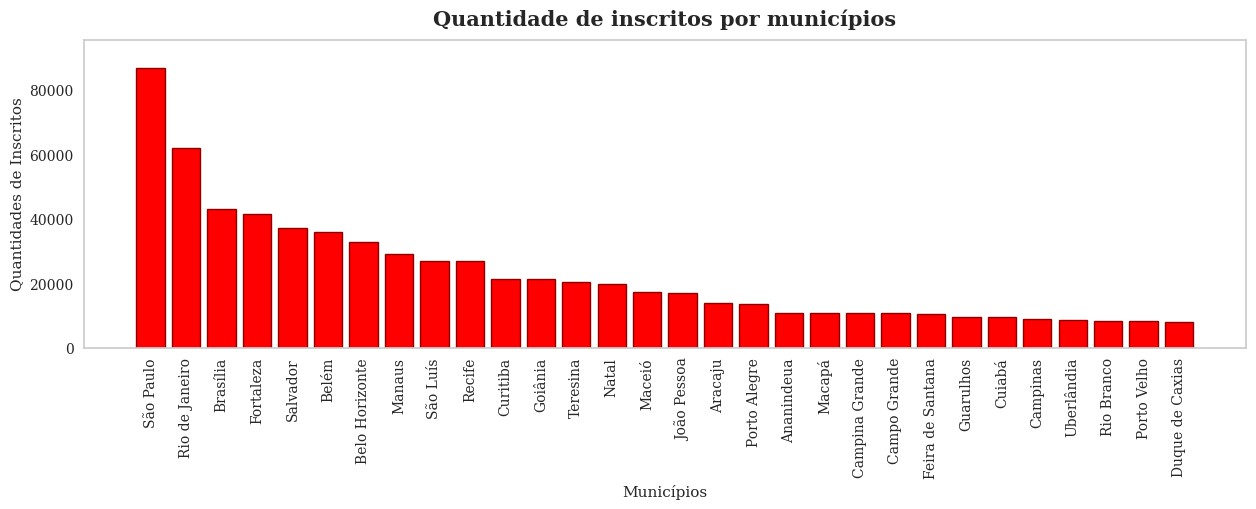

In [8]:
# Quantidade de Inscritos por municípios
quant_insc_muni(df_23)

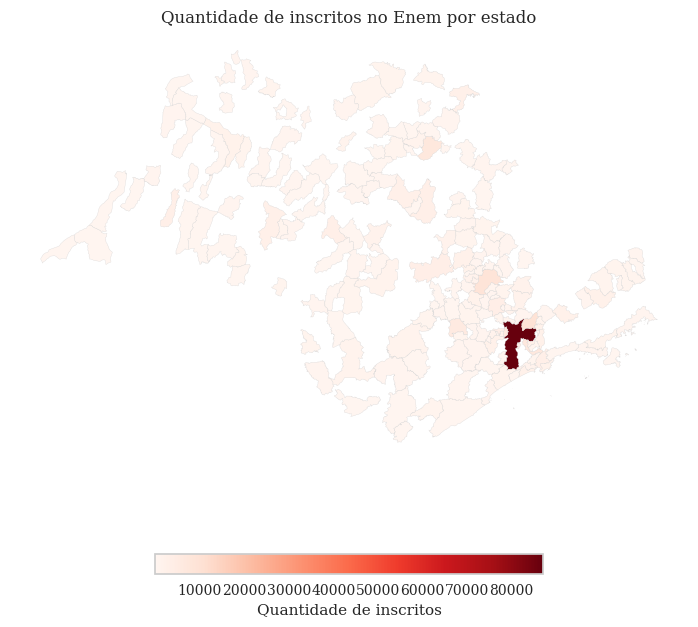

In [4]:
# Calcula a quantidade de inscritos em cada estado (amostra)
# Através dessa análise, podemos concluir que a maria dos inscritos é de São Paulo
inscritos_estado(df)

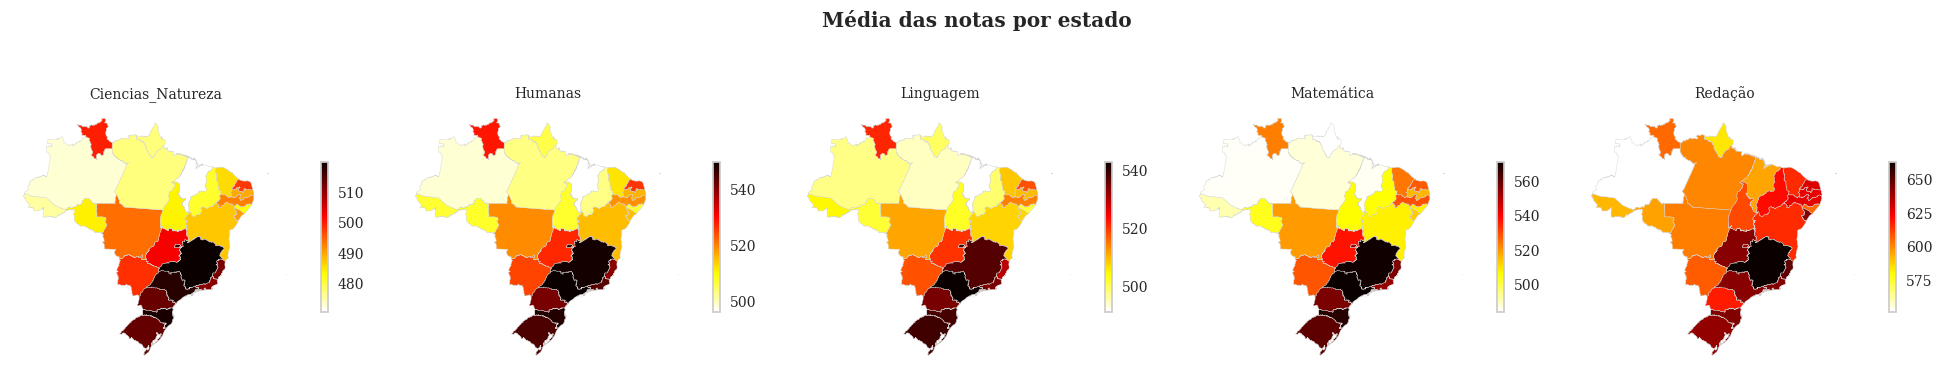

In [10]:
# Calcula a nota média de cada prova por estado
# Através dessa análise, podemos concluir as regiões Sul e Sudeste possuem as maiores notas médias, e a região Norte as menores
plot_mapa_estado(df_23, np.mean, 'Média das notas por estado', 'hot_r')

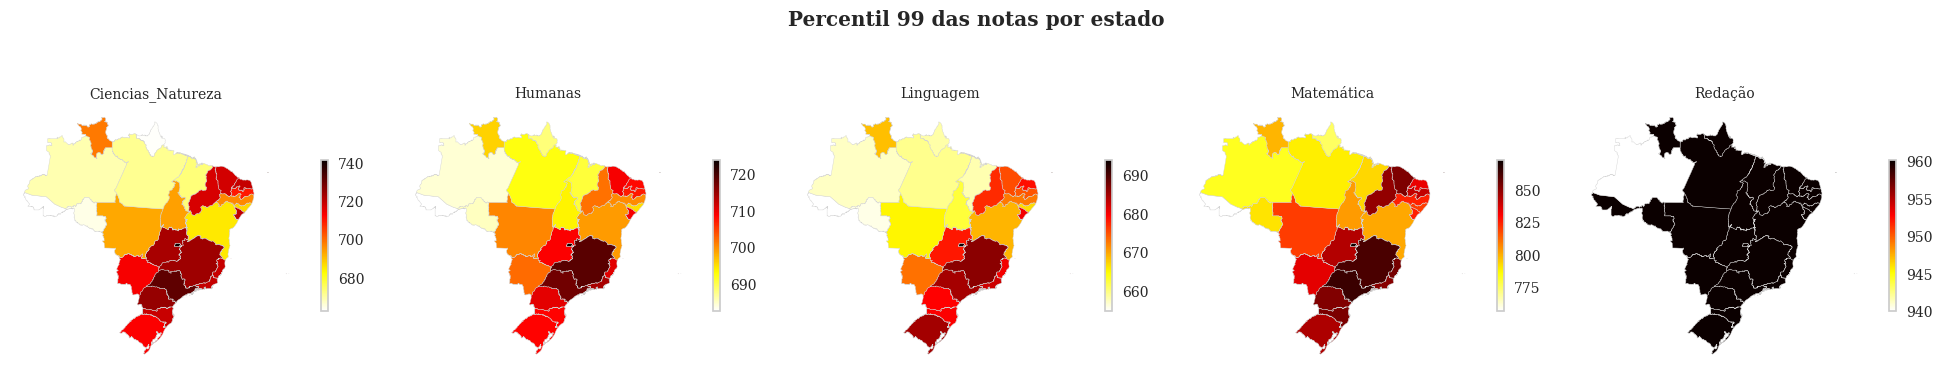

In [12]:
# Calcula a nota percentil 99 de cada prova por estado
# Através dessa análise, podemos concluir a região Sudeste possuem as maiores notas do percentil 99, e a região Norte as menores
# A diferença é ainda mais evidente em Redação, seguida de Ciências Humans e Matemática
# Em Ciências da Natureza, a diferença é aparenta ser mais suave
plot_mapa_estado(df_23, percentile(0.99), 'Percentil 99 das notas por estado', 'hot_r')

In [21]:
df['Faixa_Etaria'].describe().round(2)

count    2152164.00
mean          20.91
std            6.35
min           16.00
25%           18.00
50%           18.00
75%           21.00
max           70.00
Name: Faixa_Etaria, dtype: float64

<Axes: >

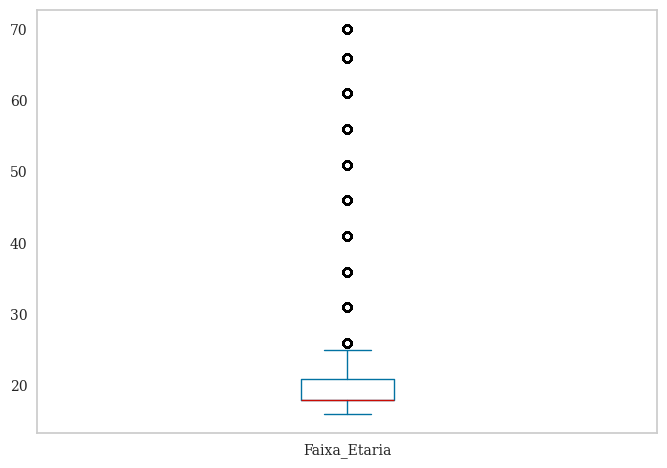

In [20]:
# box_plot(df_notas['MEDIA'], 'Boxplot das Idades', 'Idade', 'Notas')
df['Faixa_Etaria'].plot(kind = 'box', grid = False)

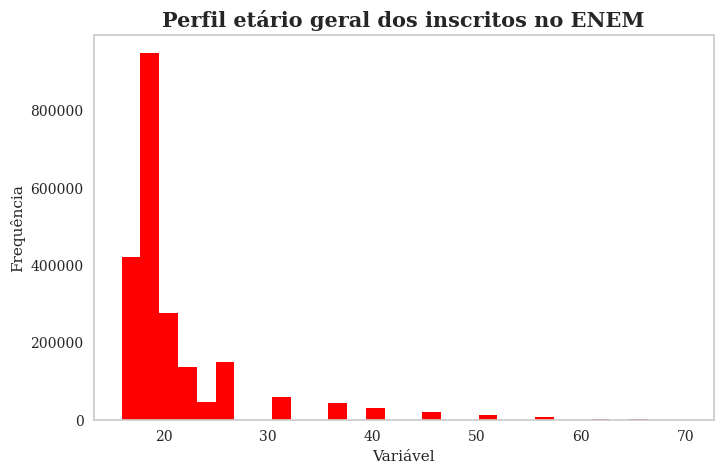

In [22]:
# histograma para o perfil etário dos inscritos
gerar_histograma(df, 'Faixa_Etaria',
                 titulo = 'Perfil etário geral dos inscritos no ENEM'
                )

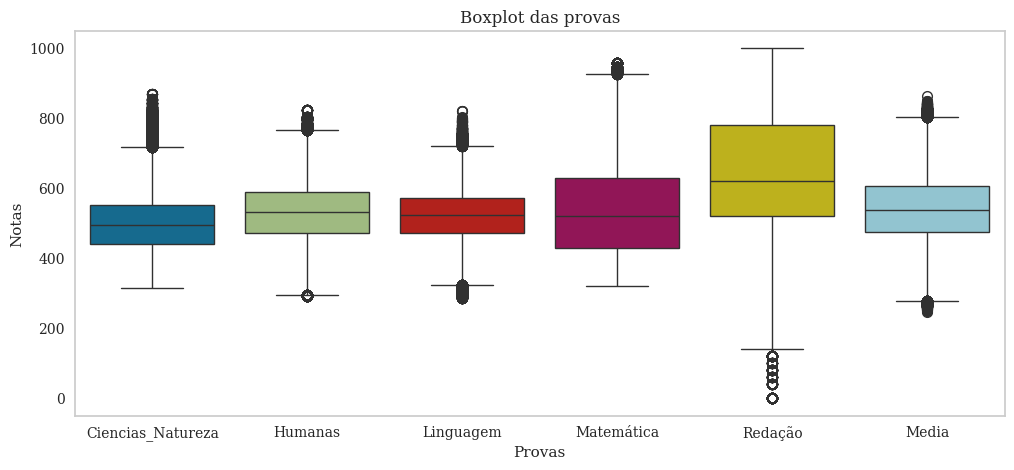

In [23]:
# boxplot das provas e da média
provas = ['Ciencias_Natureza', 'Humanas', 'Linguagem', 'Matemática', 'Redação']
box_plot(df[provas+['Media']], 'Boxplot das provas', 'Provas', 'Notas')

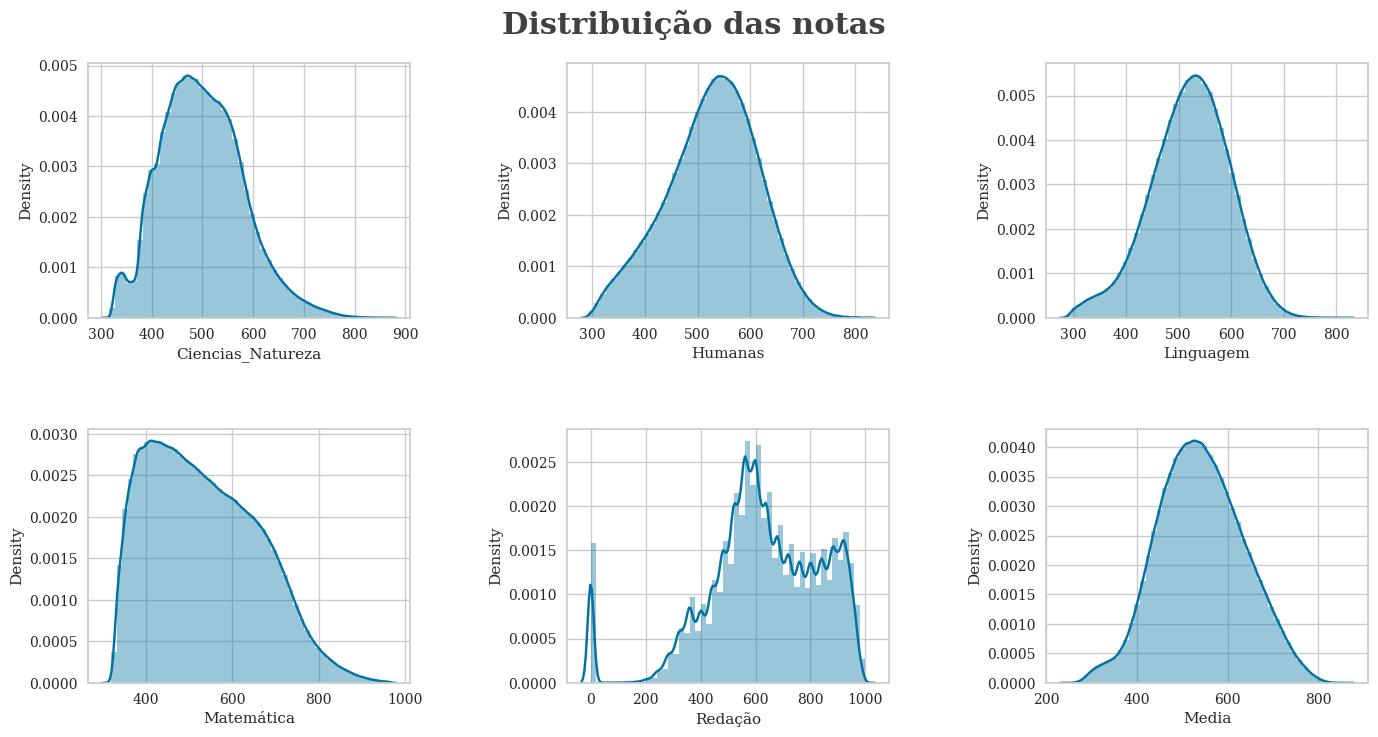

In [24]:
plot_dist_notas(df)

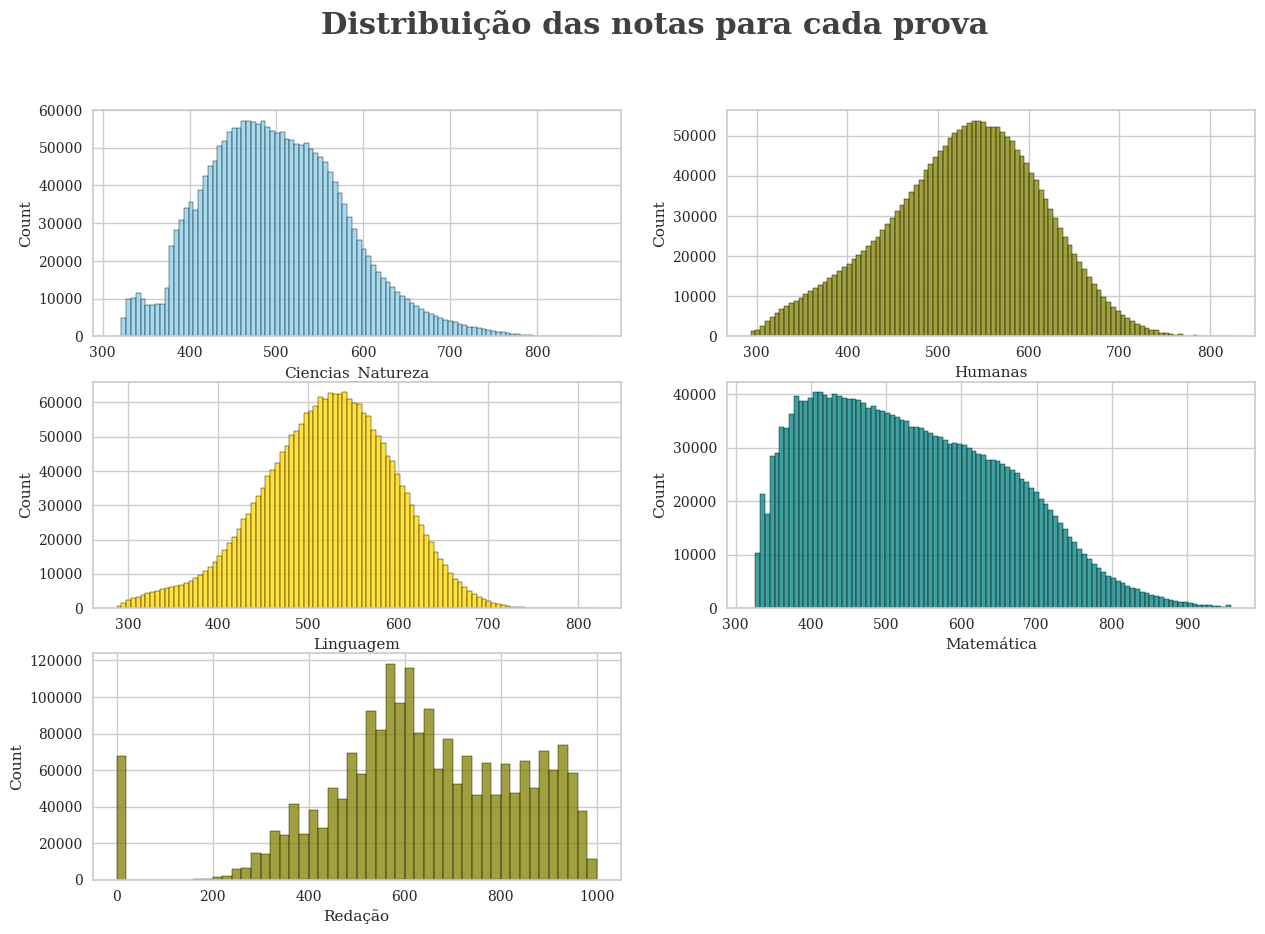

In [25]:
histo_nota_uf(df)

In [3]:
# Exportar para .csv. Sem o index, index=False; 
# df.to_csv('df_23_F.csv', index=False, encoding = "utf-8")
# Carregando os dados
# df_23_22 = reduce_mem_usage(pd.read_csv('df_23_22_new.csv', encoding = "utf-8", sep = ','))
df = pd.read_csv('enem_2023.csv', encoding = "utf-8", sep = ',')

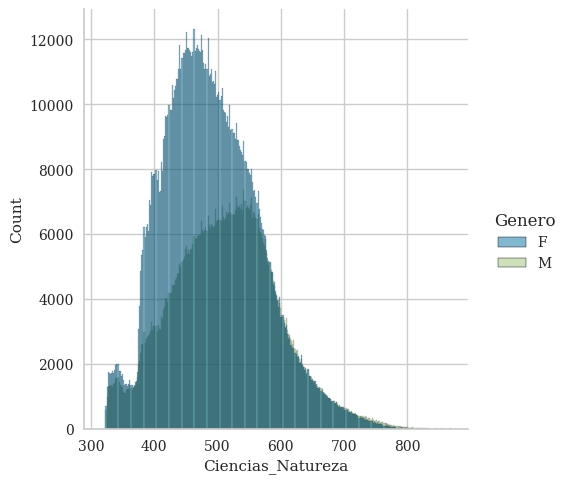

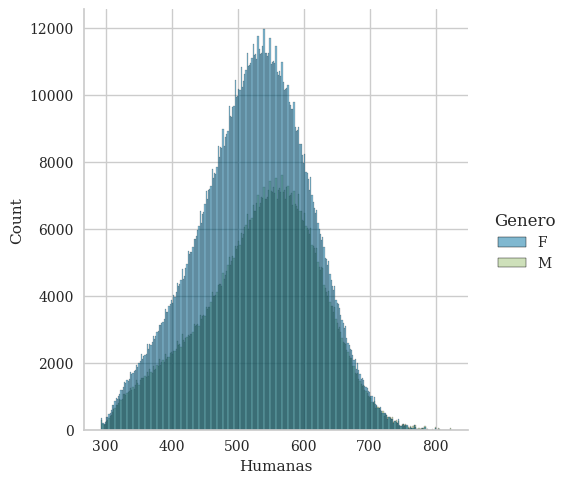

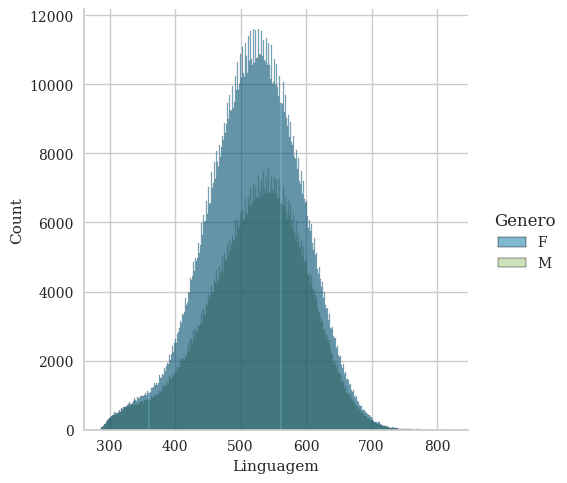

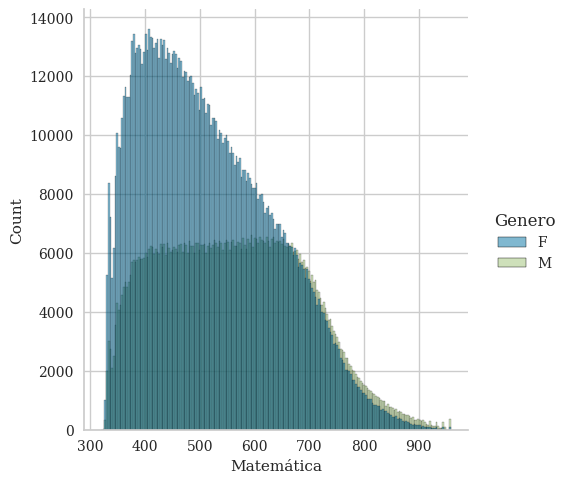

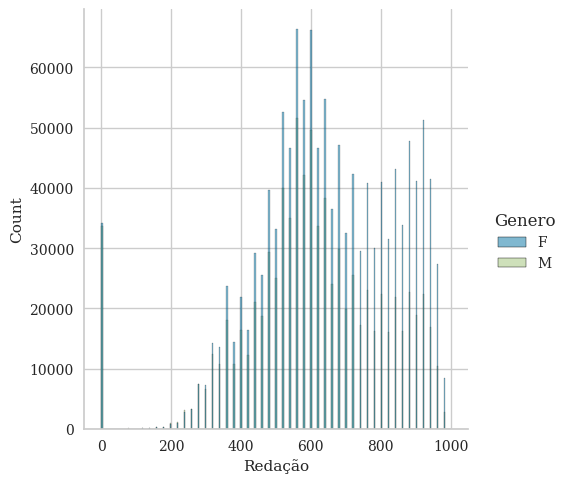

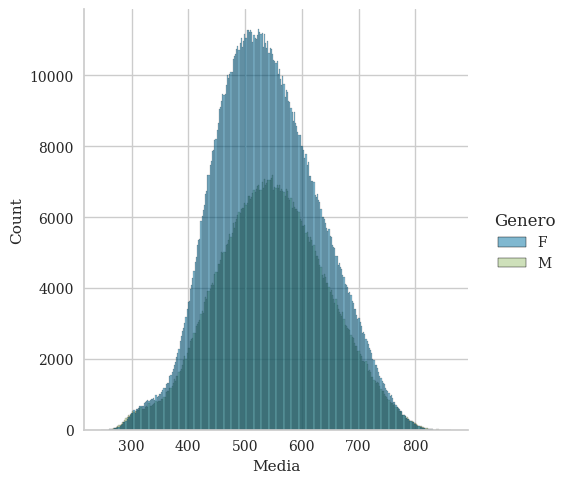

In [27]:
provas = ['Ciencias_Natureza', 'Humanas', 'Linguagem', 'Matemática', 'Redação']
for prova in provas+['Media']:
    sns.displot(data = df, x = prova, hue = 'Genero')

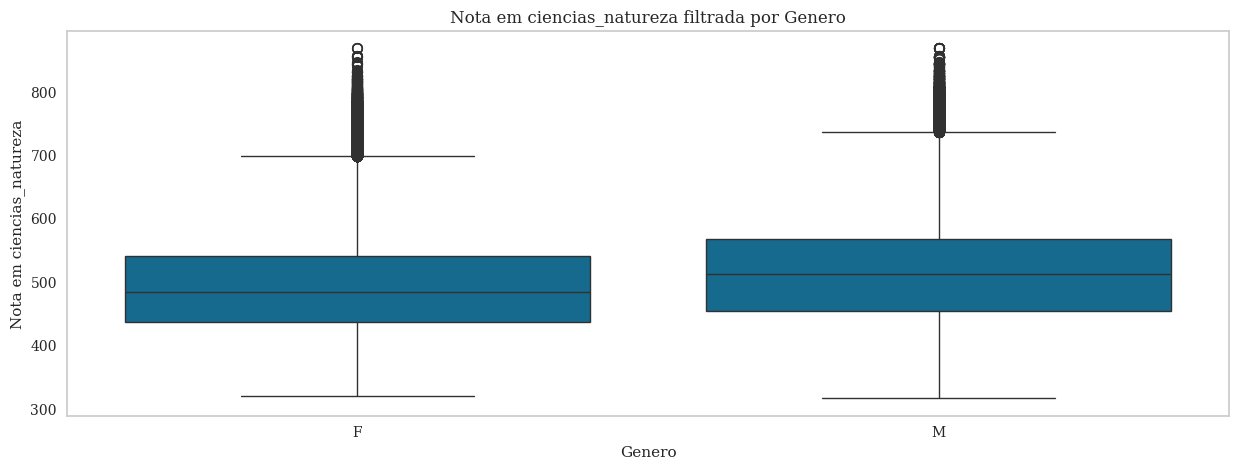

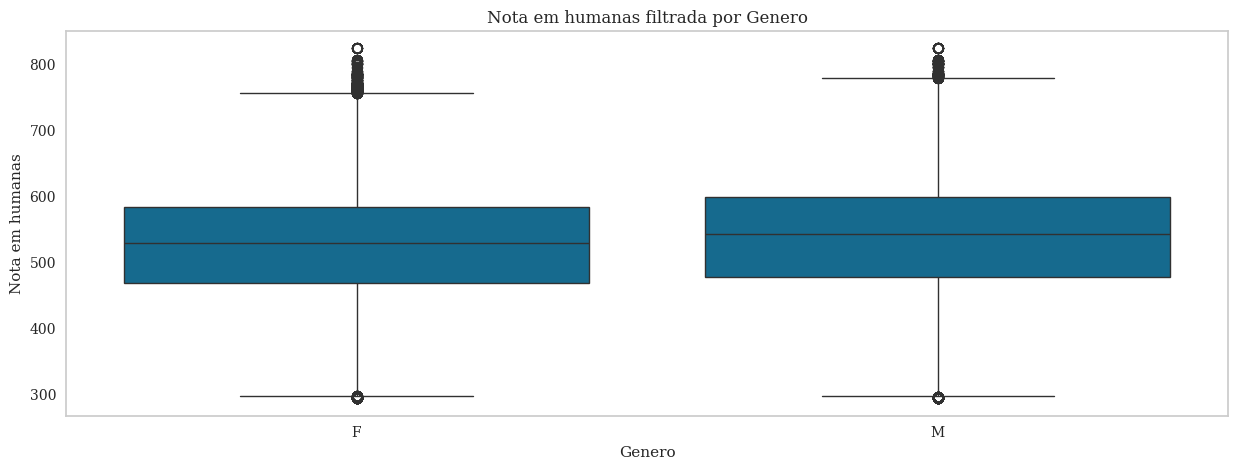

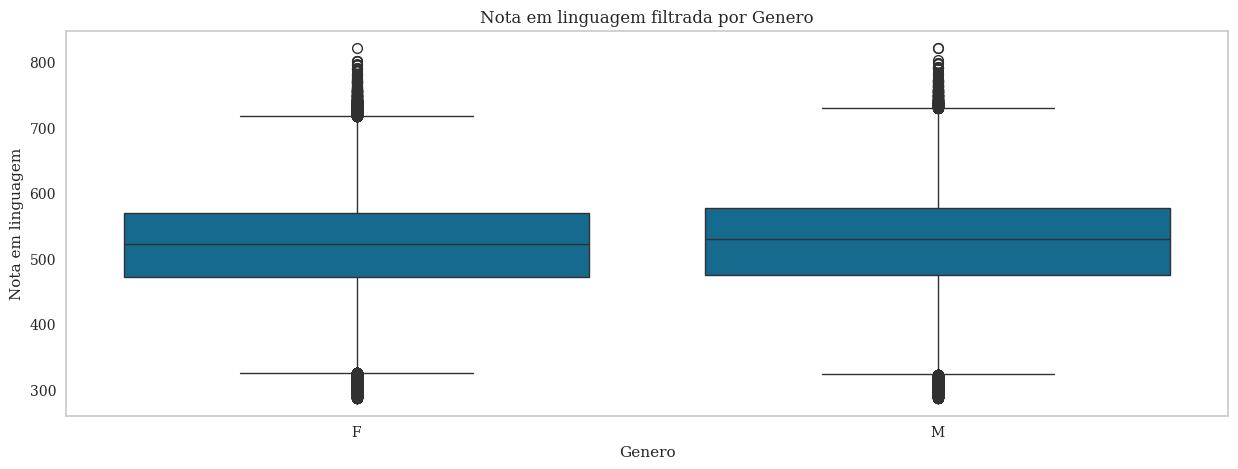

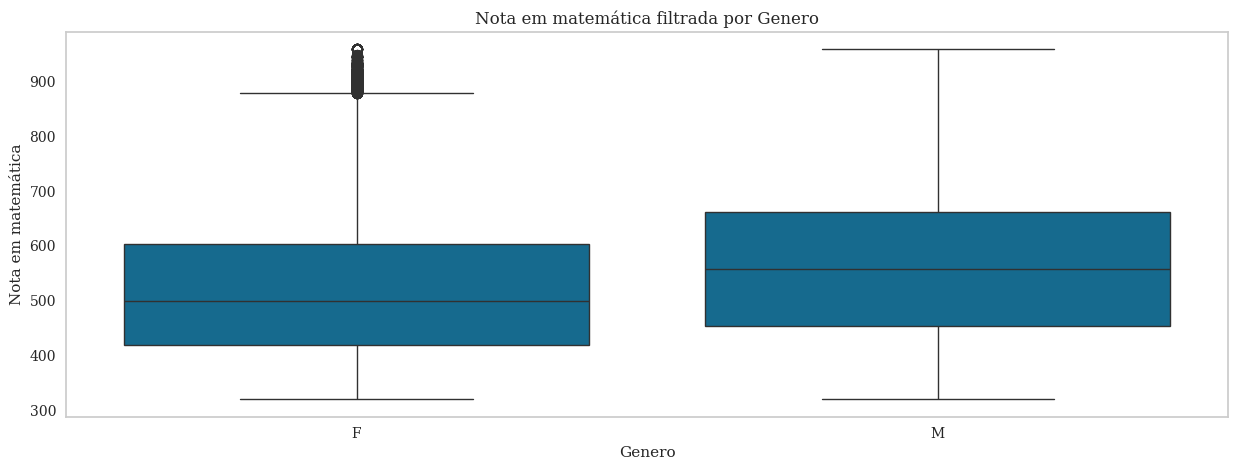

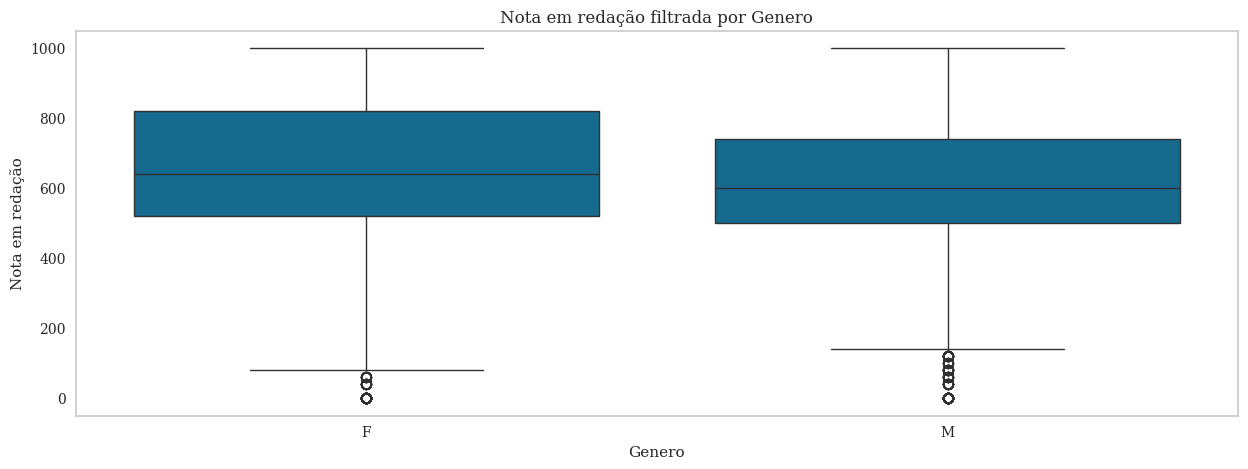

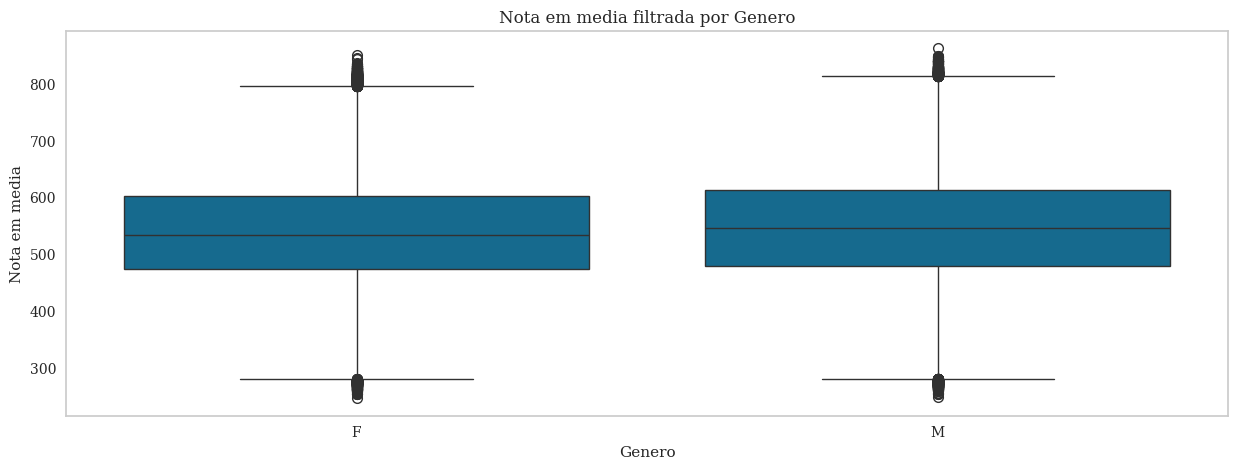

In [28]:
boxplot_por_filtro(df, 'Genero');

In [29]:
#renda_ordenada = df_19_15['Renda_mensal_familiar'].unique()
renda_ordenada = np.array(['E', 'G', 'B', 'F', 'C', 'D', 'A', 'J', 'I', 'K', 'H', 'O', 'Q',
       'M', 'P', 'L', 'N'])
renda_ordenada.sort()

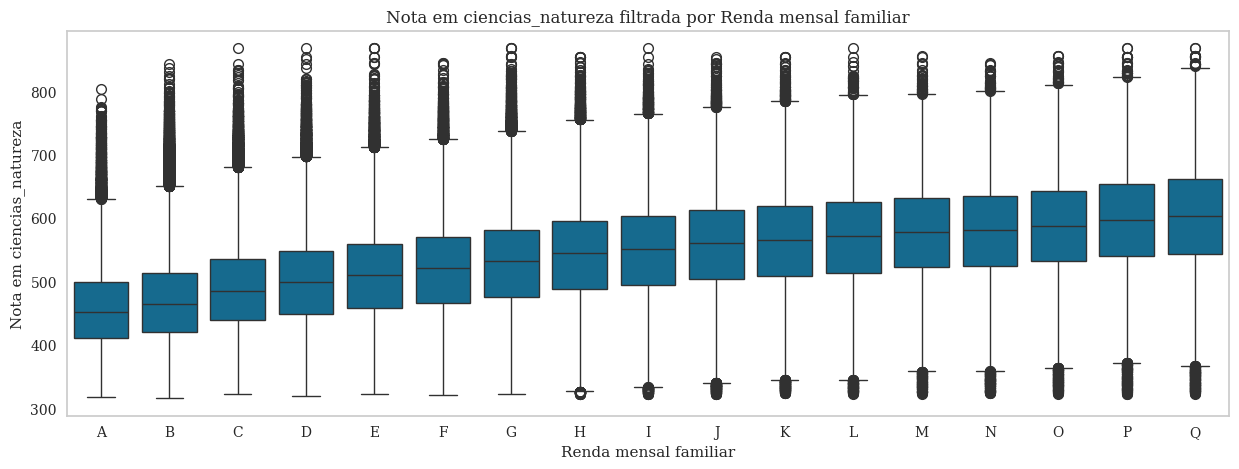

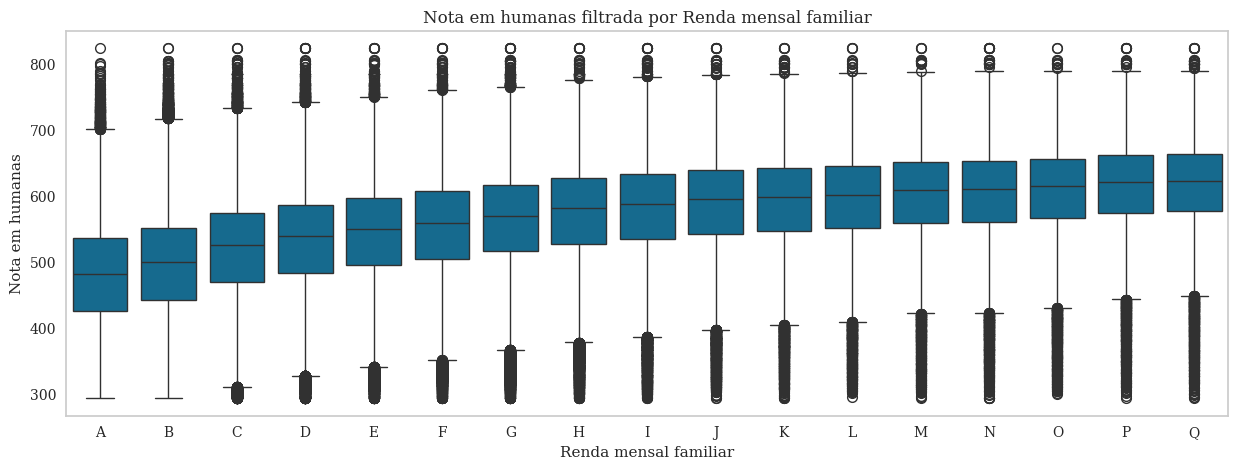

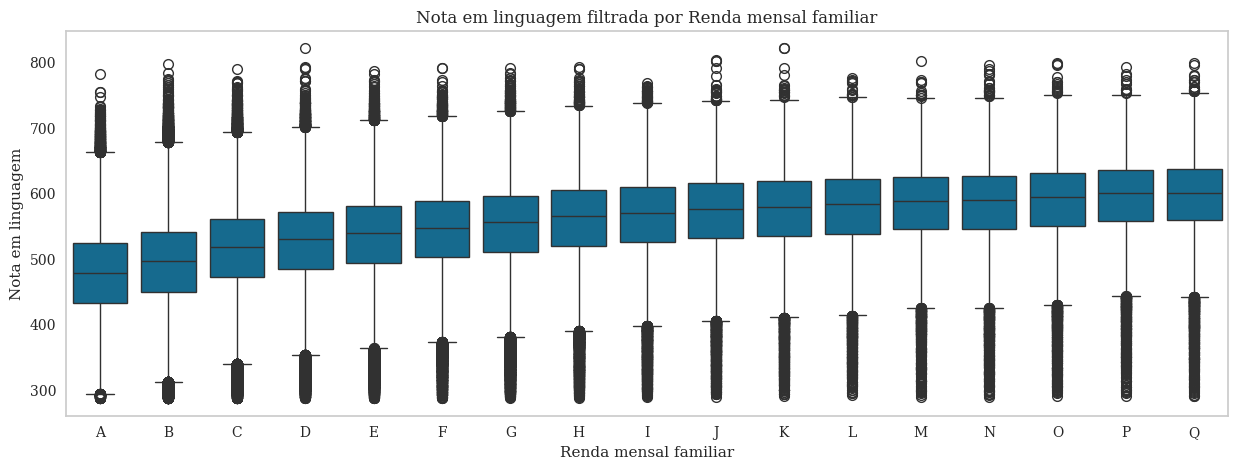

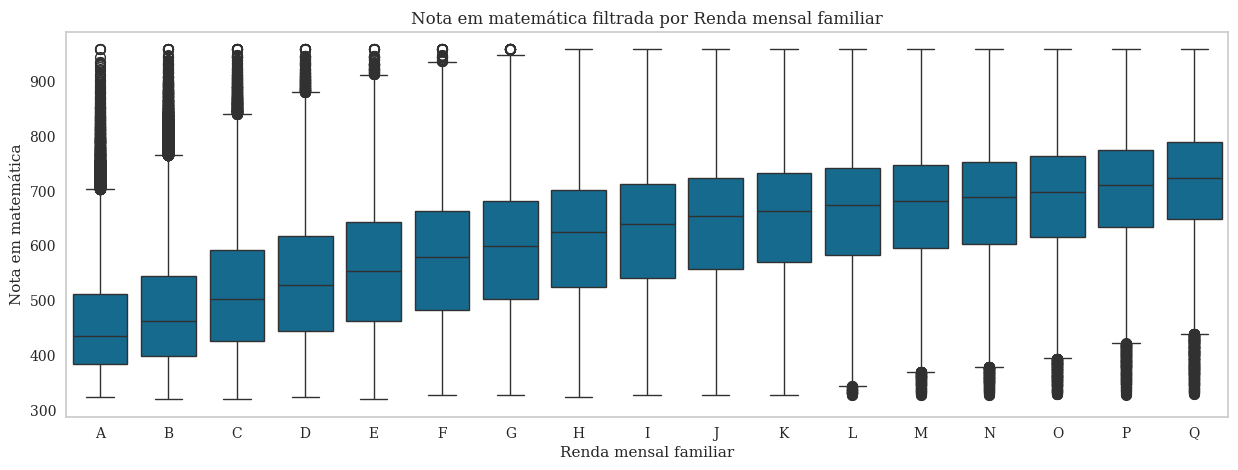

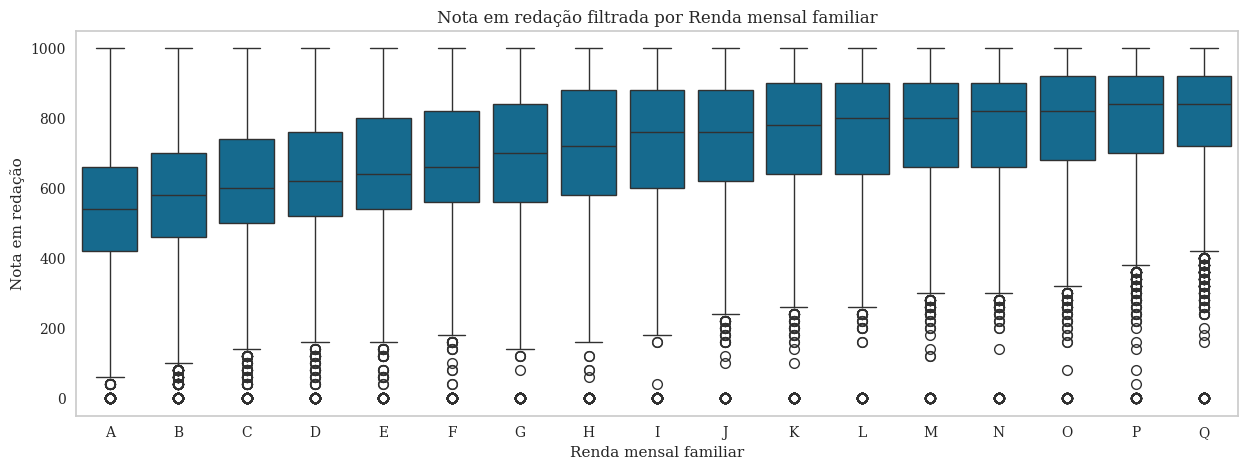

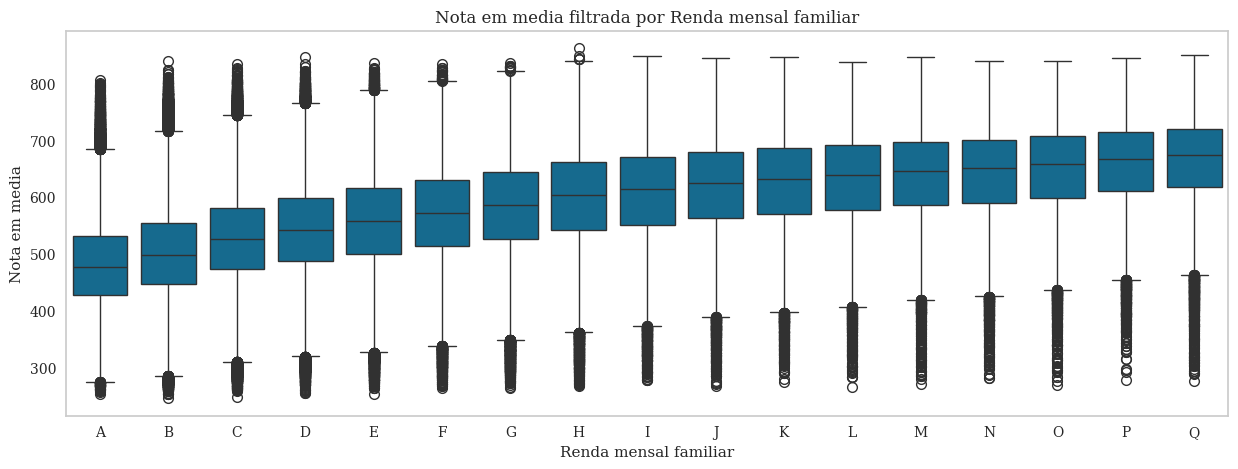

In [30]:
boxplot_por_filtro(df, 'Renda_mensal_familiar', renda_ordenada)

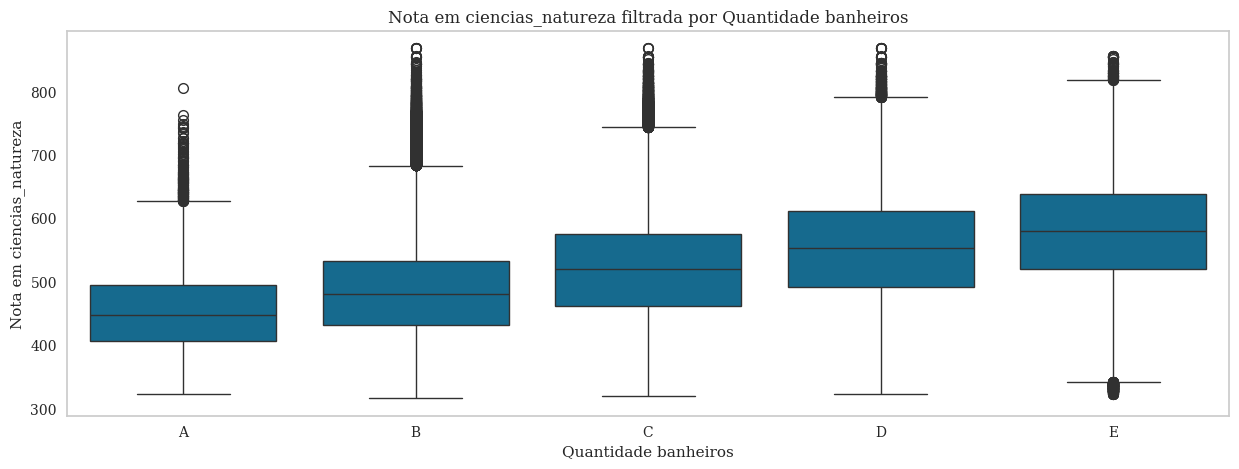

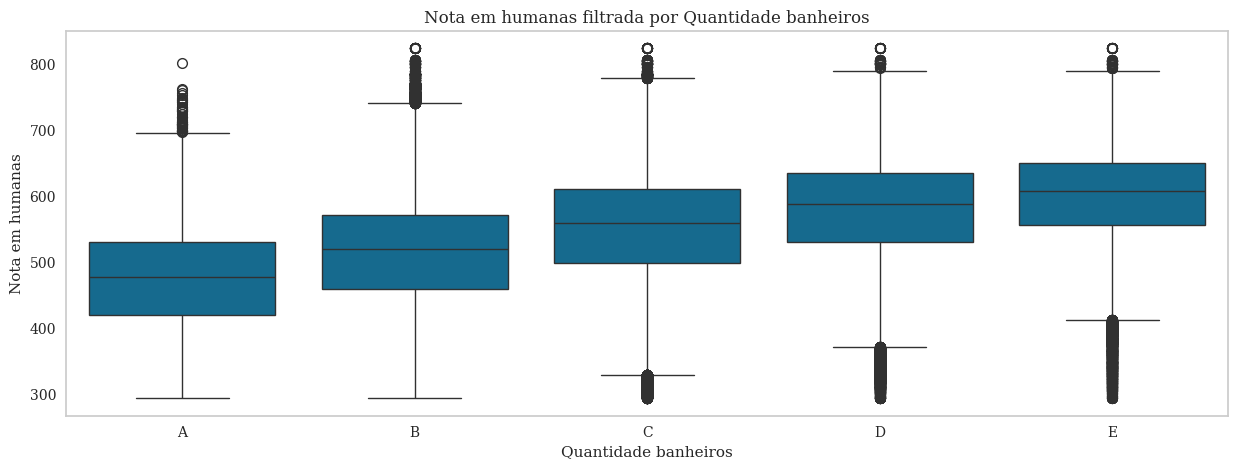

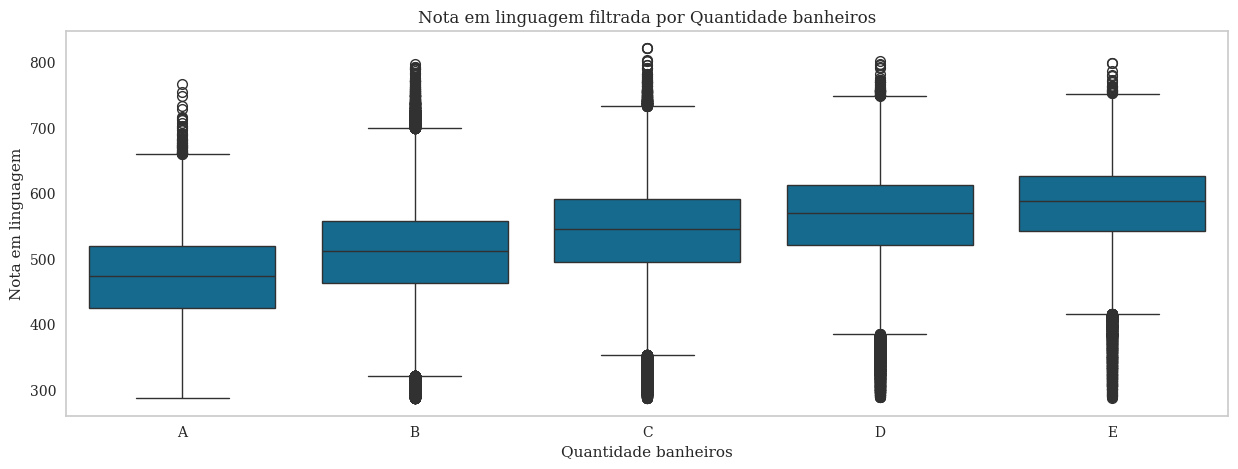

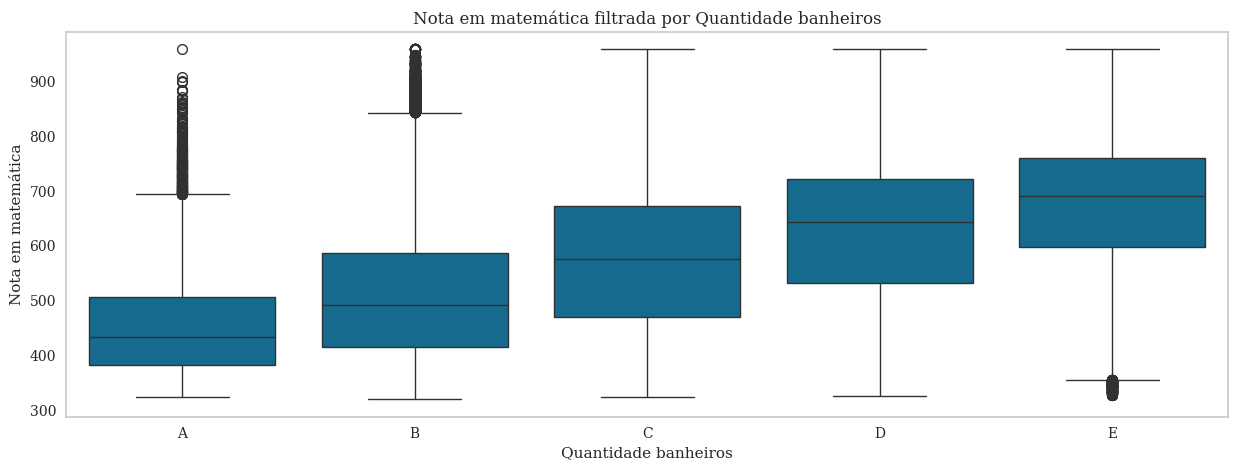

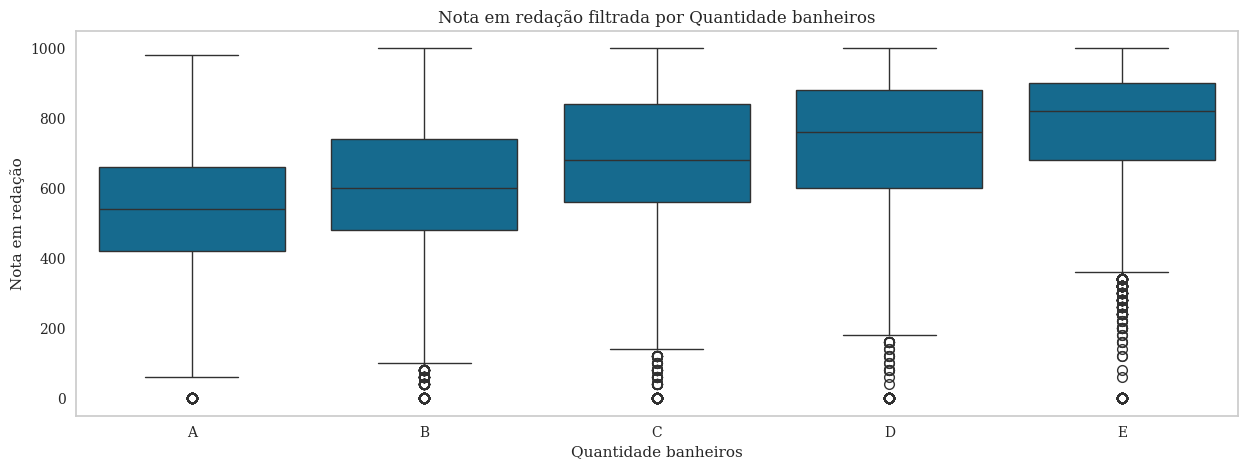

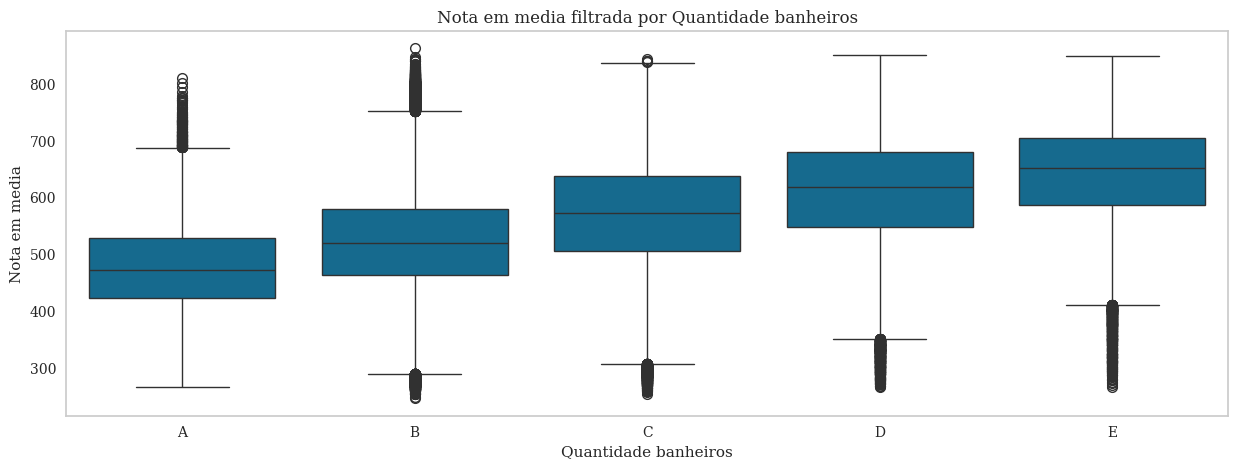

In [31]:
boxplot_por_filtro(df, 'Quantidade_banheiros', 
                   order = np.array([chr(65+i) for i in range(5)]))

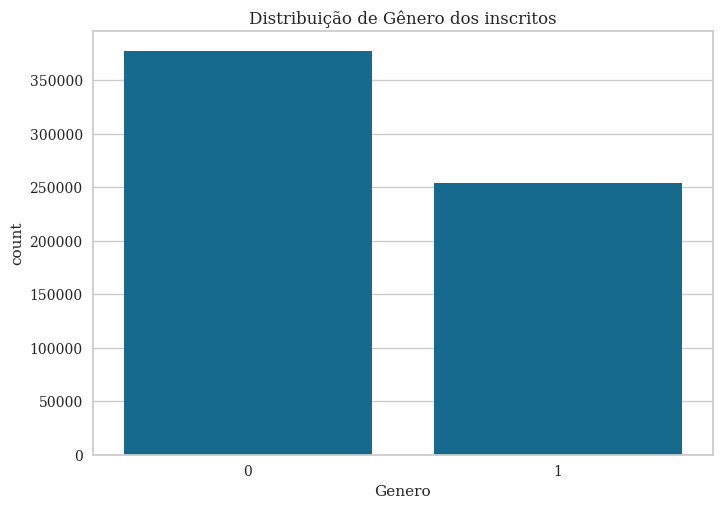

In [23]:
# Gênero
sns.countplot(x='Genero', data=df_23_22_01_SP)
plt.title('Distribuição de Gênero dos inscritos');

In [4]:
df.shape

(2152164, 40)

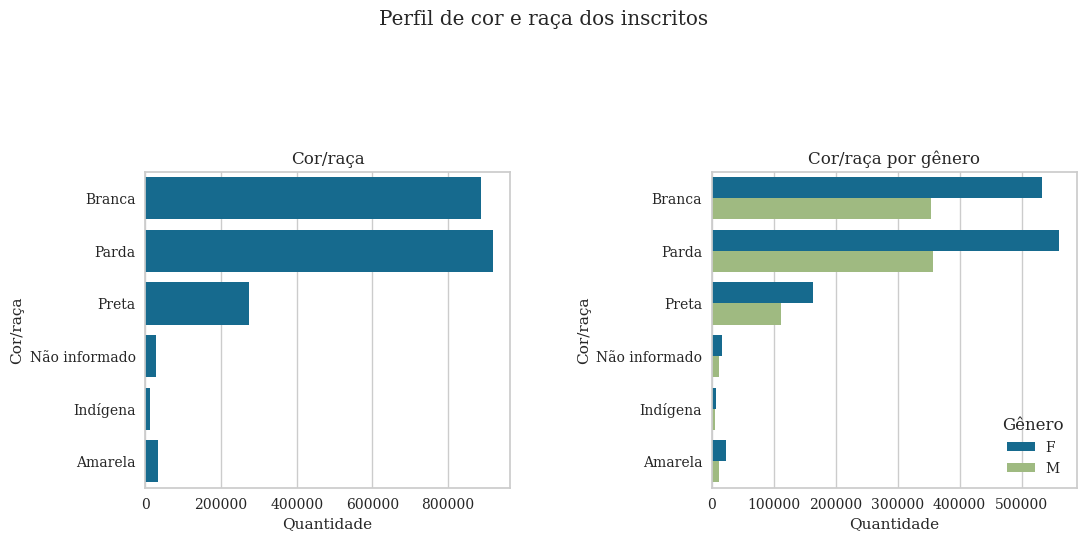

In [5]:
# Cor da pele
df['MAP_COR'] = df['Cor'].apply(map_cor)
gerar_painel_barra(df, 'MAP_COR', 'Genero', 
                   title = 'Perfil de cor e raça dos inscritos',
                   title_subplot_1 = 'Cor/raça',
                   title_subplot_2 = 'Cor/raça por gênero',
                   legend_subplot_2 = 'Gênero',
                   ylabel = 'Cor/raça')

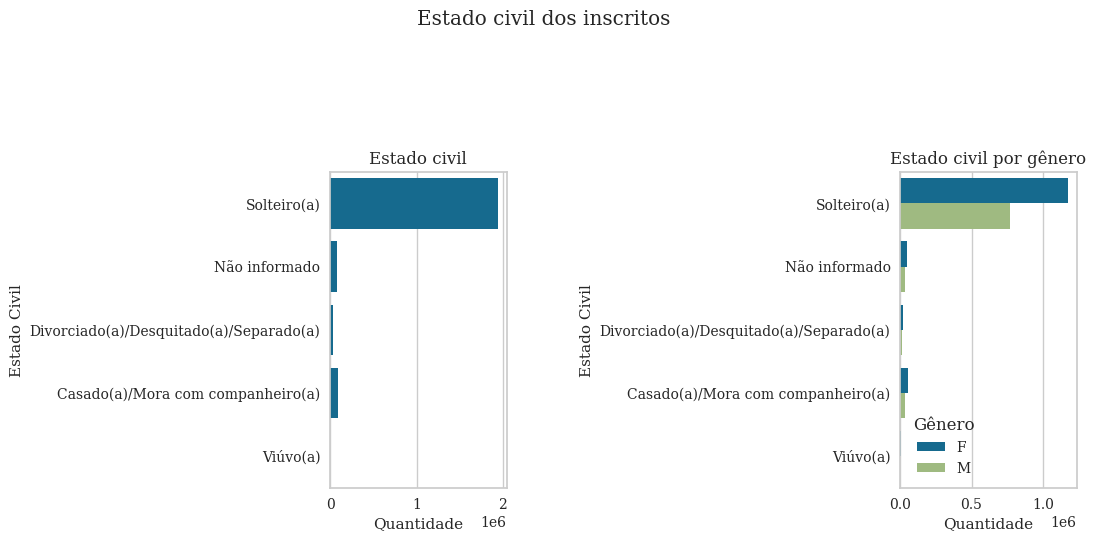

In [33]:
estado_civil(df)

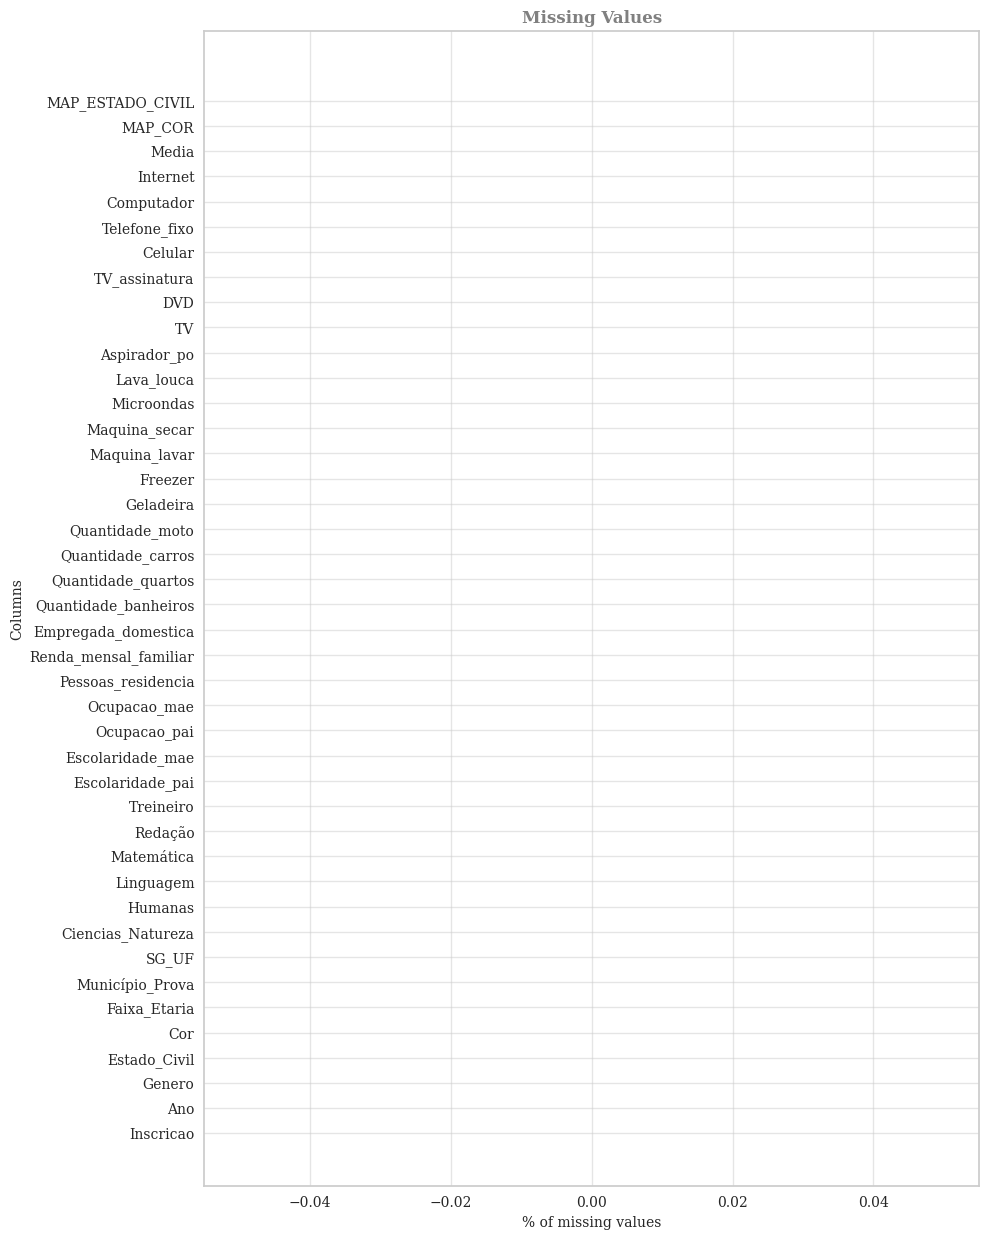

In [34]:
show_percentage_missing(df)

In [6]:
check_missing(df)

Inscricao                0.0
Ano                      0.0
Genero                   0.0
Estado_Civil             0.0
Cor                      0.0
Faixa_Etaria             0.0
Município_Prova          0.0
SG_UF                    0.0
Ciencias_Natureza        0.0
Humanas                  0.0
Linguagem                0.0
Matemática               0.0
Redação                  0.0
Treineiro                0.0
Escolaridade_pai         0.0
Escolaridade_mae         0.0
Ocupacao_pai             0.0
Ocupacao_mae             0.0
Pessoas_residencia       0.0
Renda_mensal_familiar    0.0
Empregada_domestica      0.0
Quantidade_banheiros     0.0
Quantidade_quartos       0.0
Quantidade_carros        0.0
Quantidade_moto          0.0
Geladeira                0.0
Freezer                  0.0
Maquina_lavar            0.0
Maquina_secar            0.0
Microondas               0.0
Lava_louca               0.0
Aspirador_po             0.0
TV                       0.0
DVD                      0.0
TV_assinatura 

------------------

---------------------

Estudo cobre causaliade e correlação das variáveis

Os Outliers afetam muito a correlção de person. Então o ideal para verificar seria remover os outliers de cada coluna para estudar correlação linear ou não linear

- https://cursos.alura.com.br/forum/topico-aula-9-atividade-4-removendo-outliers-110990
- https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/
- https://medium.com/analytics-vidhya/removing-outliers-from-data-using-python-and-pandas-a3b5c6cded2c

In [32]:
lista_targets = ['Ciencias_Natureza', 'Humanas', 'Linguagem', 'Matemática', 'Redação', 'Renda_mensal_familiar']

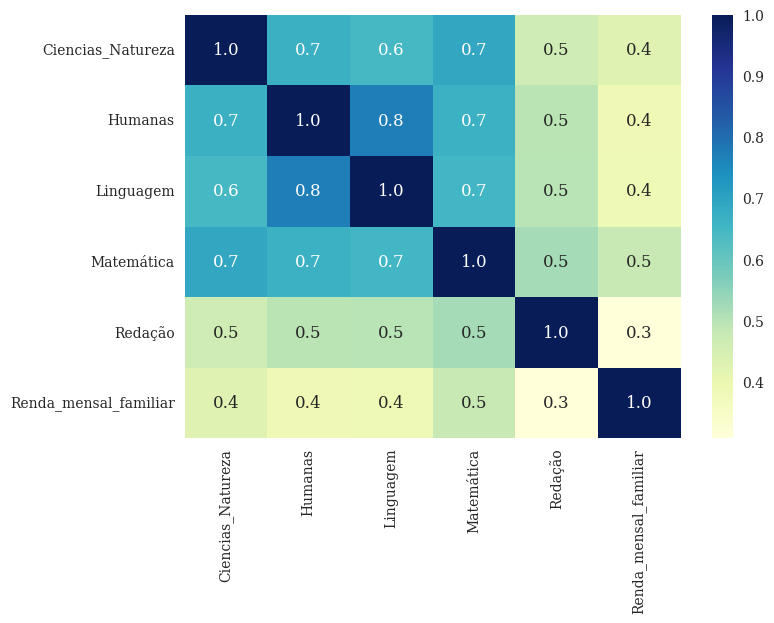

In [37]:
# Correlação entre as notas das provas do Enem
fig, ax = plt.subplots()
corr_provas = df[lista_targets].corr(method='pearson', min_periods=1, numeric_only=False)
sns.heatmap(corr_provas, annot=True, cmap = 'YlGnBu', ax = ax, fmt=".1f");

In [6]:
# Exportar para .csv. Sem o index, index=False; 
# df.to_csv('df_23_F.csv', index=False, encoding = "utf-8")
# Carregando os dados
# df_23_22 = reduce_mem_usage(pd.read_csv('df_23_22_new.csv', encoding = "utf-8", sep = ','))
df = pd.read_csv('df_23_F.csv', encoding = "utf-8", sep = ',')

In [12]:
df.head()

,Inscricao,Ano,Genero,Estado_Civil,Cor,Faixa_Etaria,Município_Prova,SG_UF,Ciencias_Natureza,Humanas,Linguagem,Matemática,Redação,Treineiro,Escolaridade_pai,Escolaridade_mae,Ocupacao_pai,Ocupacao_mae,Pessoas_residencia,Renda_mensal_familiar,Empregada_domestica,Quantidade_banheiros,Quantidade_quartos,Quantidade_carros,Quantidade_moto,Geladeira,Freezer,Maquina_lavar,Maquina_secar,Microondas,Lava_louca,Aspirador_po,TV,DVD,TV_assinatura,Celular,Telefone_fixo,Computador,Internet,Media
0,210061103945,2023,0,1,1,21,Caxias do Sul,RS,502.0,498.9,475.6,363.2,700.0,0,0,4,2,0,5,2,0,1,3,1,A,B,A,B,A,B,A,A,B,A,A,A,A,0,1,507.94
1,210060214087,2023,0,1,3,17,Fortaleza,CE,459.0,508.5,507.2,466.7,880.0,0,3,3,1,1,5,2,0,1,1,0,A,B,A,A,A,A,A,A,B,A,A,D,A,0,1,564.28
2,210059980948,2023,0,1,3,18,Quixadá,CE,402.5,379.2,446.9,338.3,560.0,0,1,1,0,0,4,1,0,1,0,0,A,B,A,A,A,A,A,A,B,A,A,B,A,0,0,425.38
3,210060801601,2023,1,1,1,26,Batatais,SP,564.7,630.3,610.4,680.2,600.0,0,0,4,0,3,2,5,0,1,2,1,B,B,B,B,A,B,A,B,C,B,A,C,A,1,1,617.12
4,210059085130,2023,1,1,3,23,Natal,RN,644.9,620.2,626.9,736.3,860.0,0,5,2,3,1,4,1,0,2,2,0,A,B,A,B,A,B,A,B,B,A,A,E,A,1,1,697.66


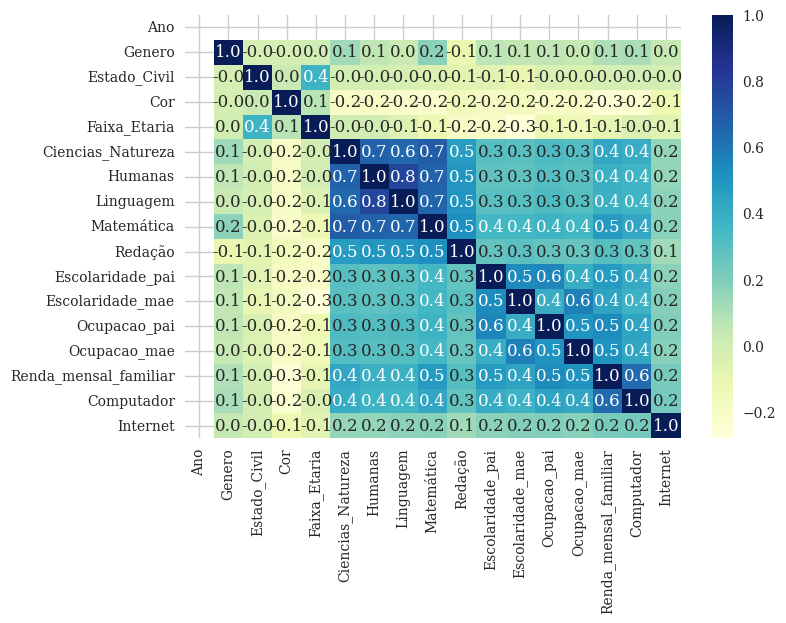

In [24]:
# Correlação entre as notas das provas do Enem
fig, ax = plt.subplots()
#plt.figure(figsize=(200,200))
corr_provas = df.drop(columns = ['Inscricao', 'Treineiro', 'Município_Prova', 'SG_UF', 'Media',
                                 'Quantidade_moto', 'Geladeira', 'Freezer', 'Maquina_lavar', 
                                 'Microondas','Maquina_secar', 'Lava_louca','Aspirador_po',
                                 'TV', 'DVD','TV_assinatura','Celular','Telefone_fixo','Empregada_domestica',
                                'Pessoas_residencia','Quantidade_banheiros','Quantidade_quartos','Quantidade_carros']).corr()
sns.heatmap(corr_provas, annot=True, cmap = 'YlGnBu', ax = ax, fmt=".1f");
#sns.heatmap(df, annot=True, cmap = 'YlGnBu', ax = ax);

In [15]:
corr = df['Faixa_Etaria'].corr(df['Matemática'])
print(corr)

-0.12224458861018091


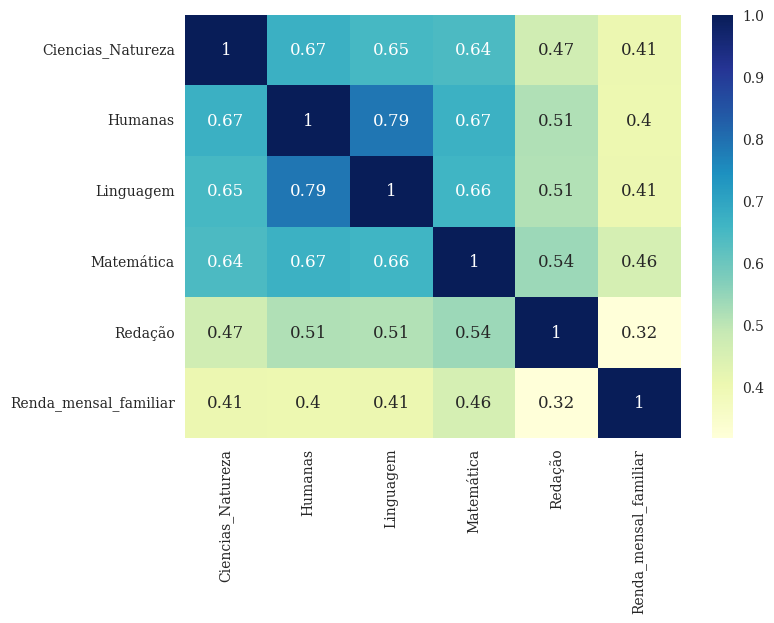

In [36]:
# Correlação entre as notas das provas do Enem
#plt.figure(figsize=(15,12))
#fig, ax = plt.subplots()
#corr_provas = df.drop(columns = ['Inscricao', 'Treineiro']).corr(method = 'spearman')
#sns.heatmap(corr_provas, annot=True, cmap = 'YlGnBu', ax = ax);


# Correlação entre as notas das provas do Enem
fig, ax = plt.subplots()
corr_provas = df[lista_targets].corr(method='spearman', min_periods=1, numeric_only=False)
sns.heatmap(corr_provas, annot=True, cmap = 'YlGnBu', ax = ax);

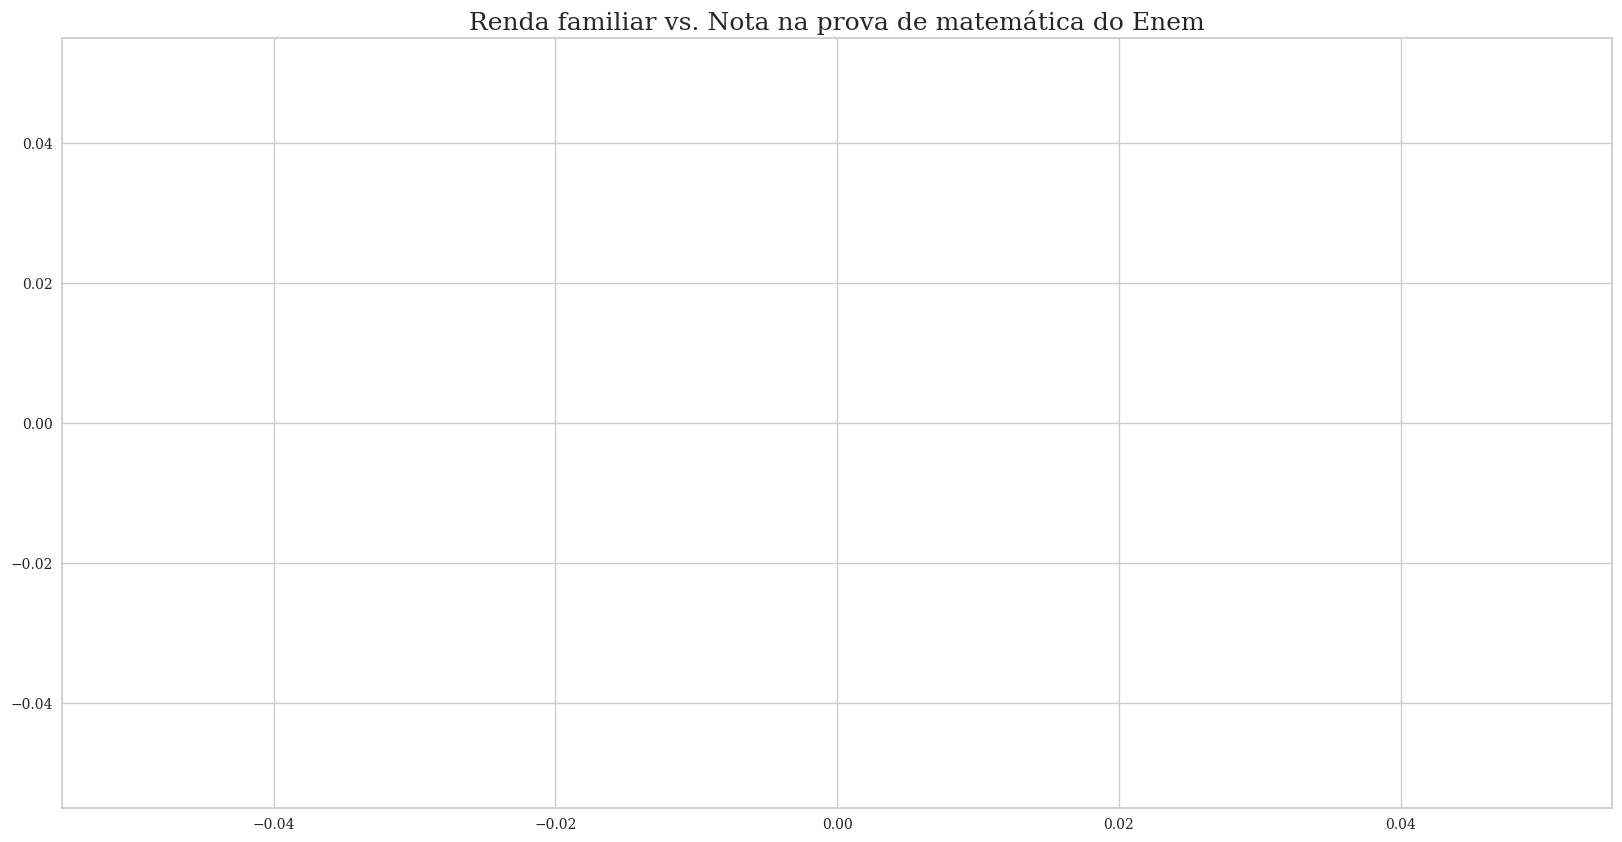

ValueError: array must not contain infs or NaNs

In [38]:
renda_nota(df)

In [25]:
df_23_22_01_SP['Renda_mensal_familiar'].unique()

array([ 5,  2,  3,  6,  4,  1,  7,  0,  8, 10, 12,  9, 13, 11, 15, 14, 16])

In [26]:
df_23_22_01_SP['Renda_mensal_familiar'].isnull().values.any()

np.False_

In [27]:
df_23_22_01_SP['Renda_mensal_familiar'].isnull().values.any().sum()

np.int64(0)

In [28]:
df_23_22_01_SP['Renda_mensal_familiar'].shape

(630449,)

In [ ]:
#df_19_15['Renda_mensal_familiar'].dropna(axis = 0, how='all', inplace = True)

In [ ]:
df_23_22_01_SP.dropna(how = 'any', subset = 'Renda_mensal_familiar').shape

In [ ]:
df_23_22_01_SP['Renda_mensal_familiar'].shape

--------

In [29]:
check_duplicate_lines(df_23_22_01_SP)

'0 duplicate lines'

In [7]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


---

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


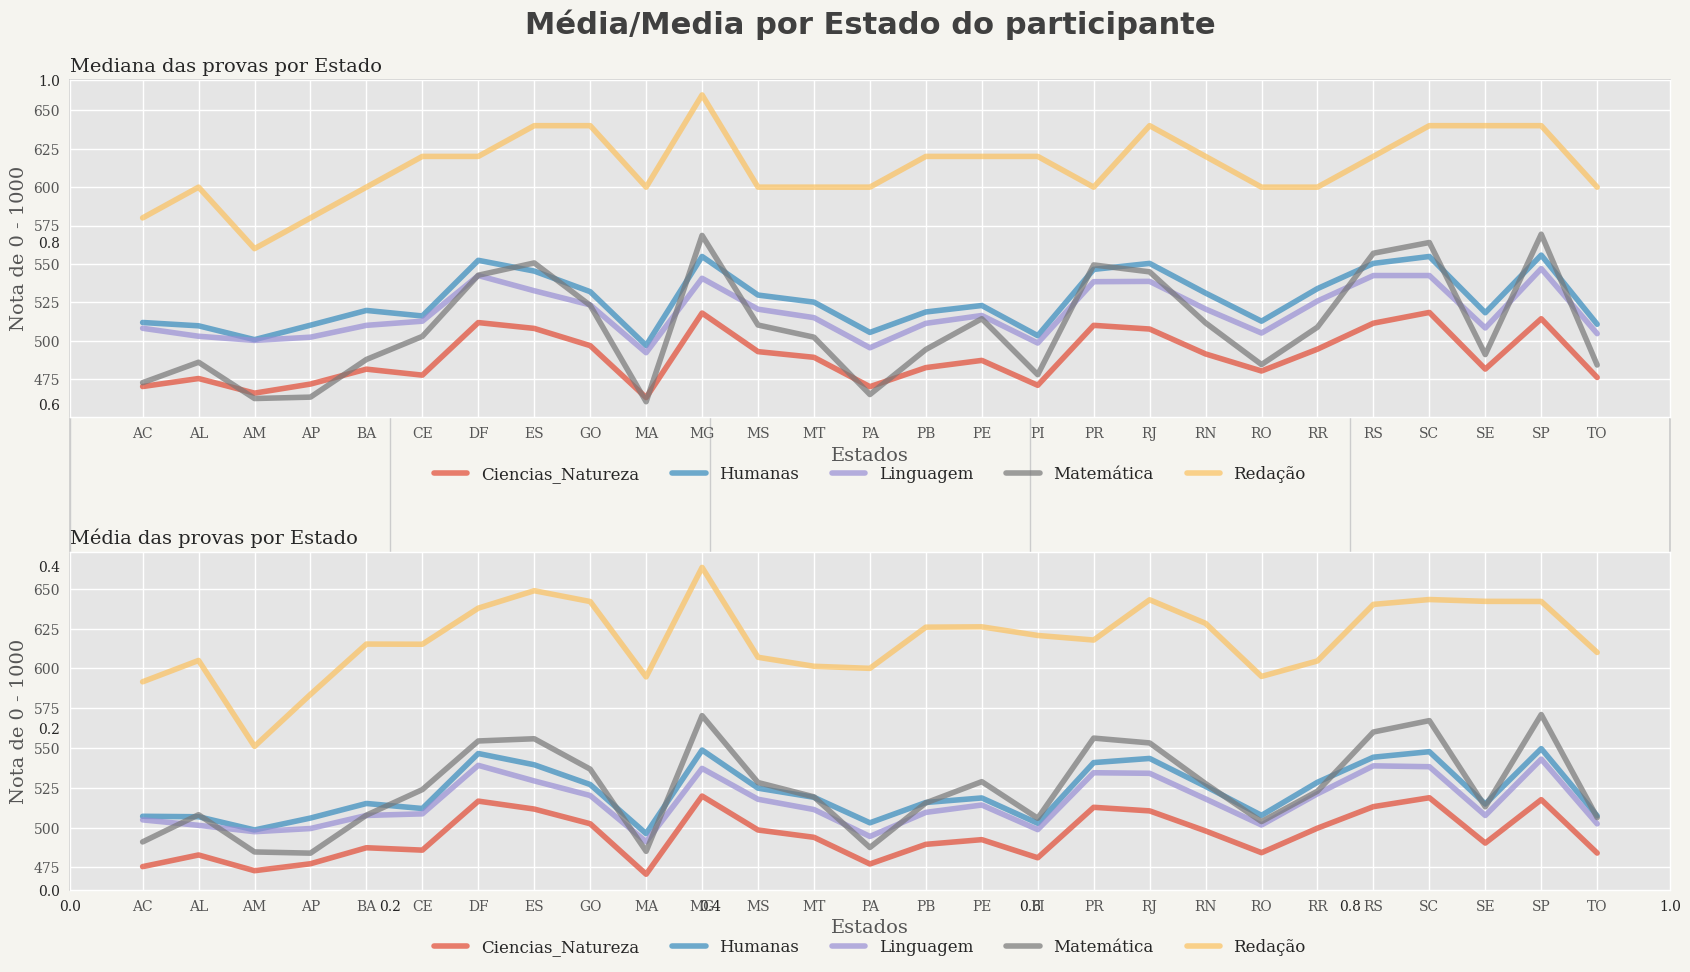

In [36]:
# Média e Mediana por estado
media_mediana_estado(df)

## Testes de Hipótese
- Análise da nota de matemática para brancos e pretos
- Através dessa análise é possível observar como são diferentes as notas para pessoas de cor branca e preta
- Pessoas de cor branca possuem notas maiores do que pessoas pretas, tanto na média quanto no percentil 99

Resultado
- Como o p-valor é baixíssimo, devemos rejeitar a hipótese nula (de que não existe correlação entre a cor do inscrito e a sua nota de Matemática no Enem)
- Desse modo, é possível concluir que a cor está correlacionada com a nota de Matemática do Enem

In [11]:
brancos = df.query("Cor == 1 and Matemática == Matemática")['Matemática']
pretos = df.query("Cor == 2 and Matemática == Matemática")['Matemática']
stats.ks_2samp(brancos, pretos)

KstestResult(statistic=np.float64(0.26063919895538723), pvalue=np.float64(0.0), statistic_location=np.float64(554.6), statistic_sign=np.int8(-1))

In [ ]:
brancos.describe()

Nota média em matemática de inscritos brancos: 574.53
Nota média em matemática de inscritos pretos: 496.19
Percentil 99 da nota em matemática de inscritos brancos: 868.8
Percentil 99 da nota em matemática de inscritos pretos: 768.0
Kolmogorov-Smirnov test: KstestResult(statistic=np.float64(0.26063919895538723), pvalue=np.float64(0.0), statistic_location=np.float64(554.6), statistic_sign=np.int8(-1))


ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'labelfontfamily', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

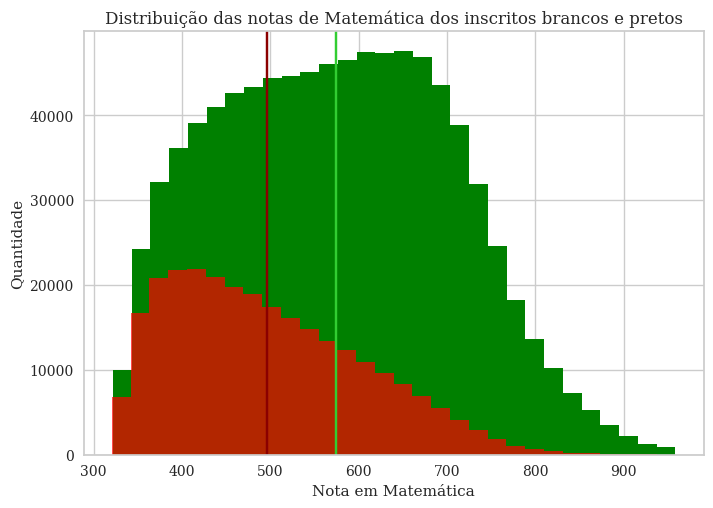

In [12]:
cor_nota(df)

In [15]:
# Separa dados em treino (80%) e teste (20%) - Hold out split
df_train, df_test = train_test_split(enem_2019, test_size=0.2, random_state=42)

In [ ]:
# leitura dos dados (amostra de 5% para a base de treino)
df_desenv, df_submit = leitura_dados(path_input_train, path_input_test, sample_frac=0.05)
print (df_desenv.shape, df_submit.shape)

## Dataprep

In [39]:
# substitui notas missing por zero
for coluna in lista_targets:
    df[coluna] = df[coluna].fillna(0)
    
# Lebel Encoder
for coluna in lista_vars_explicativas:
    try:
        # substitui valores missings por um valor negativo arbitrário (para o modelo tentar capturar)
        df[coluna] = df[coluna].astype(float).replace(np.nan, -99999)
    except:
        # substitui valores missings por um valor categórico arbitrário (para o modelo tentar capturar)
        df[coluna] = df[coluna].astype(str).fillna("missing").replace("nan", "missing")

        # labelencoder
        labelencoder = LabelEncoder()
        labelencoder.fit_transform(list(set(df[coluna].unique().tolist())))
        df[coluna] = labelencoder.transform(df[coluna])

NameError: name 'lista_vars_explicativas' is not defined

---